## Example 2: Text classification

This example has been adapted from a post by Jaya Aiyappan, available at
[Analytics Vidhya](https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b#:~:text=The%20Naive%20Bayes%20classifier%20is,time%20and%20less%20training%20data).

We will generate a small dataset of sentences that are classified as either "statements" or "questions."

We will assume that occurance and placement of words within a sentence is independent of each other
(i.e., the features are conditionally independent given $y$). So the sentence "this is my book" is the same as "is this my book."
We will treat words as case insensitive.

In [1]:
import csv
import math
import random
import pandas as pd
import numpy as np

In [2]:
# Generate text data for two classes, "statement" and "question"

text_train = [['This is my novel book', 'statement'],
              ['this book has more than one author', 'statement'],
              ['is this my book', 'question'],
              ['They are novels', 'statement'],
              ['have you read this book', 'question'],
              ['who is the novels author', 'question'],
              ['what are the characters', 'question'],
              ['This is how I bought the book', 'statement'],
              ['I like fictional characters', 'statement'],
              ['what is your favorite book', 'question']]

text_test = [['this is the book', 'statement'], 
             ['who are the novels characters', 'question'], 
             ['is this the author', 'question']]

# Load training and test data into pandas data frames

training_data = pd.DataFrame(text_train, columns= ['sentence', 'class'])
print(training_data)
print('\n------------------------------------------\n')
testing_data = pd.DataFrame(text_test, columns= ['sentence', 'class'])
print(testing_data)


                             sentence      class
0               This is my novel book  statement
1  this book has more than one author  statement
2                     is this my book   question
3                     They are novels  statement
4             have you read this book   question
5            who is the novels author   question
6             what are the characters   question
7       This is how I bought the book  statement
8         I like fictional characters  statement
9          what is your favorite book   question

------------------------------------------

                        sentence      class
0               this is the book  statement
1  who are the novels characters   question
2             is this the author   question


In [3]:
# Partition training data by class

stmt_docs = [train['sentence'] for index,train in training_data.iterrows() if train['class'] == 'statement']
question_docs = [train['sentence'] for index,train in training_data.iterrows() if train['class'] == 'question']

# Get word frequencies for each sentence and class

def get_words(text):
    # Initialize word list
    words = [];
    # Loop through each sentence in input array
    for text_row in text:       
        # Check the number of words. Assume each word is separated by a blank space
        # so that the number of words is the number of blank spaces + 1
        number_of_spaces = text_row.count(' ')
        # loop through the sentence and get words between blank spaces.
        for i in range(number_of_spaces):
            # Check for for last word
            words.append([text_row[:text_row.index(' ')].lower()])
            text_row = text_row[text_row.index(' ')+1:]  
            i = i + 1        
        words.append([text_row])
    return np.unique(words)

# Get frequency of each word in each document

def get_doc_word_frequency(words, text):  
    word_freq_table = np.zeros((len(text),len(words)), dtype=int)
    i = 0
    for text_row in text:
        # Insert extra space between each pair of words to prevent
        # partial match of words
        text_row_temp = ''
        for idx, val in enumerate(text_row):
            if val == ' ':
                 text_row_temp = text_row_temp + '  '
            else:
                  text_row_temp = text_row_temp + val.lower()
        text_row = ' ' + text_row_temp + ' '
        j = 0
        for word in words: 
            word = ' ' + word + ' '
            freq = text_row.count(word)
            word_freq_table[i,j] = freq
            j = j + 1
        i = i + 1
    
    return word_freq_table

In [4]:
# Get word frequencies for statement documents

word_list_s = get_words(stmt_docs)
word_freq_table_s = get_doc_word_frequency(word_list_s, stmt_docs)
tdm_s = pd.DataFrame(word_freq_table_s, columns=word_list_s)
print(tdm_s)

   are  author  book  bought  characters  fictional  has  how  i  is  like  \
0    0       0     1       0           0          0    0    0  0   1     0   
1    0       1     1       0           0          0    1    0  0   0     0   
2    1       0     0       0           0          0    0    0  0   0     0   
3    0       0     1       1           0          0    0    1  1   1     0   
4    0       0     0       0           1          1    0    0  1   0     1   

   more  my  novel  novels  one  than  the  they  this  
0     0   1      1       0    0     0    0     0     1  
1     1   0      0       0    1     1    0     0     1  
2     0   0      0       1    0     0    0     1     0  
3     0   0      0       0    0     0    1     0     1  
4     0   0      0       0    0     0    0     0     0  


In [5]:
# Get word frequencies over all statement documents

freq_list_s = word_freq_table_s.sum(axis=0) 
freq_s = dict(zip(word_list_s,freq_list_s))
print(freq_s)

{'are': 1, 'author': 1, 'book': 3, 'bought': 1, 'characters': 1, 'fictional': 1, 'has': 1, 'how': 1, 'i': 2, 'is': 2, 'like': 1, 'more': 1, 'my': 1, 'novel': 1, 'novels': 1, 'one': 1, 'than': 1, 'the': 1, 'they': 1, 'this': 3}


In [6]:
# Get word frequencies for question documents

word_list_q = get_words(question_docs)
word_freq_table_q = get_doc_word_frequency(word_list_q, question_docs)
tdm_q = pd.DataFrame(word_freq_table_q, columns=word_list_q)
print(tdm_q)

   are  author  book  characters  favorite  have  is  my  novels  read  the  \
0    0       0     1           0         0     0   1   1       0     0    0   
1    0       0     1           0         0     1   0   0       0     1    0   
2    0       1     0           0         0     0   1   0       1     0    1   
3    1       0     0           1         0     0   0   0       0     0    1   
4    0       0     1           0         1     0   1   0       0     0    0   

   this  what  who  you  your  
0     1     0    0    0     0  
1     1     0    0    1     0  
2     0     0    1    0     0  
3     0     1    0    0     0  
4     0     1    0    0     1  


In [7]:
# Get word frequencies over all question documents

freq_list_q = word_freq_table_q.sum(axis=0) 
freq_q = dict(zip(word_list_q,freq_list_q))
print(freq_q)

{'are': 1, 'author': 1, 'book': 3, 'characters': 1, 'favorite': 1, 'have': 1, 'is': 3, 'my': 1, 'novels': 1, 'read': 1, 'the': 2, 'this': 2, 'what': 2, 'who': 1, 'you': 1, 'your': 1}


In [8]:
# Get word probabilities for statement class

prob_s = []
for word, count in zip(word_list_s, freq_list_s):
    #print(word, count)
    prob_s.append(count/len(word_list_s))
    
# Get word probabilities for question class

prob_q = []
for count in freq_list_q:
    prob_q.append(count/len(word_list_q))
    
print('Probability of words for "statement" class \n')
print(dict(zip(word_list_s, prob_s)))
print('------------------------------------------- \n')
print('Probability of words for "question" class \n')
print(dict(zip(word_list_q, prob_q)))

Probability of words for "statement" class 

{'are': 0.05, 'author': 0.05, 'book': 0.15, 'bought': 0.05, 'characters': 0.05, 'fictional': 0.05, 'has': 0.05, 'how': 0.05, 'i': 0.1, 'is': 0.1, 'like': 0.05, 'more': 0.05, 'my': 0.05, 'novel': 0.05, 'novels': 0.05, 'one': 0.05, 'than': 0.05, 'the': 0.05, 'they': 0.05, 'this': 0.15}
------------------------------------------- 

Probability of words for "question" class 

{'are': 0.0625, 'author': 0.0625, 'book': 0.1875, 'characters': 0.0625, 'favorite': 0.0625, 'have': 0.0625, 'is': 0.1875, 'my': 0.0625, 'novels': 0.0625, 'read': 0.0625, 'the': 0.125, 'this': 0.125, 'what': 0.125, 'who': 0.0625, 'you': 0.0625, 'your': 0.0625}


In [9]:
# Calculate prior for one class
def prior(className):    
    denominator = len(stmt_docs) + len(question_docs)
    
    if className == 'statement':
        numerator =  len(stmt_docs)
    else:
        numerator =  len(question_docs)
    return np.divide(numerator,denominator)

# Calculate class conditional probability for a sentence
def classCondProb(sentence, className):
    words = get_words(sentence)
    prob = 1
    found_word = False 
    
    # fixing the error from in-lab exercise 
    for word in words:
        if className == 'statement':
            if word in word_list_s :   
                idx = np.where(word_list_s == word)
                prob = prob * prob_s[np.array(idx)[0,0]]
                # check that there is a word in training set
                found_word = True
        else:
            if word in word_list_q :   
                idx = np.where(word_list_q == word)
                prob = prob * prob_q[np.array(idx)[0,0]]
                # check that there is a word in training set
                found_word = True
    if found_word :
        prob = 0
    return prob

# Predict class of a sentence
def predict(sentence):
    prob_statement = classCondProb(sentence, 'statement') * prior('statement')
    prob_question = classCondProb(sentence, 'question') * prior('question')
    if  prob_statement > prob_question:
        return 'statement'
    else:
        return 'question'

### In-lab exercise: Laplace smoothing

Run the code below and figure out why it fails.

When a word does not appear with a specific class in the training data, its class-conditional probability is 0, and we are unable to
get a reasonable probability for that class.

Research Laplace smoothing, and modify the code above to implement Laplace smoothing (setting the frequency of all words with frequency 0 to a frequency of 1).
Run the modified code on the test set.

### Take home exercise

Find a more substantial text classification dataset, clean up the documents, and build your NB classifier. Write a brief report on your in-lab and take home exercises and results.

In [10]:
test_docs = list([test['sentence'] for index,test in testing_data.iterrows()])
print('Getting prediction for %s"' % test_docs[0])
predict(test_docs[0])

Getting prediction for this is the book"


'question'

In [11]:
def split_dataset(df, training_ratio=0.6, shuffle=True):
    if shuffle :
        df = df.sample(frac=1)
    t_size = int(df.shape[0] * training_ratio)
    # train , test 
    return df.iloc[:t_size], df.iloc[t_size:]

In [12]:
class Text_Naive_Bayes:
    def __init__(self, with_prior=False):
        self.word_freqs = {} 
        self.n_words = {}
        self.y_class = {}
        self.with_prior = with_prior
        
    def get_word_frequency(self, sentence_array):
        # make text_array into 1d array 
        sentence_series = pd.Series(sentence_array)
        sentence_series += ' ' # add space for spliting words
        word_series = pd.Series(sentence_series.sum().split(' '))
        word_series = word_series[word_series != ' '] # drop unwanted elements
        
        # return dict of counting word frequency 
        # <key> word : <value> frequency 
        return word_series.value_counts().to_dict(), len(word_series)
        
    def fit(self, X, y):
        # X => array of vector
        # y => array of class
        self.y_class = pd.Series(y).value_counts().to_dict()
        for y_class in self.y_class : 
            y_index = np.where(y == y_class)
            
            y_X = X.copy()[y_index]
            self.word_freqs[y_class], self.n_words[y_class] = self.get_word_frequency(y_X)
            
        all_X = X.copy()
        self.word_freqs['all'], self.n_words['all'] = self.get_word_frequency(all_X)
        self.y_class['all'] = X.shape[0] # count the number of samples
        
    def predict(self, X, alpha=1):
        '''
        Laplace Smoothing Doc ! 
        
        https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf#:~:text=A%20solution%20would%20be%20Laplace,incorporated%20in%20every%20probability%20estimate.&text=this%20is%20a%20way%20of,it%20is%20called%20Laplace%20smoothing.
        
        with laplace smoothing
        alpha is a laplace smoothing parameter. when alpha > 0 means using laplace transform. 
        if alpha == 0 : disable laplace smoothing : 
            == > if a class doesn't have an input word, the probability of that class will be 0.
        '''
        d = len(self.word_freqs['all']) # the number of possible words in all categories
        pred_df = pd.DataFrame()
        
        # p(y|x) = TT p(x|y)
        
        n = self.y_class['all'] # number of training size
        for y_class in self.y_class :
            if y_class != 'all' : 
                y_hat = []
                n_y = self.y_class[y_class] # the number of class y in training set 
                n_wy = self.n_words[y_class] # the number of words occur in y_class 
                for sentence in X : 
                    p_xy = 1
                    words = pd.Series(sentence.split(' '))                
                    for w in words : 
                        n_xy = 0
                        if w in self.word_freqs[y_class] : 
                            n_xy = self.word_freqs[y_class][w] # the number of word x happens in class y   

                        # p(x|y) = n(x, y=yi) / n(yi)
                        p_xy *= (n_xy + alpha) / (n_wy + alpha*d) 

                    if self.with_prior :
                        p_xy *= n_y / n
#                     clear_output(wait=True)
#                     display(sentence)
#                     display(f'class : {y_class} ; prob : {p_xy}')
                    y_hat.append(p_xy)               
                pred_df[y_class] = y_hat
    
        pred_df['y_pred'] = np.argmax(pred_df.values, axis=1)
        pred_df['y_pred'] = [pred_df.columns[v] for v in pred_df['y_pred']]
        self.pred_df = pred_df
        return pred_df['y_pred'].values

In [13]:
def get_accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / len(y_true)

In [14]:
nb_text = Text_Naive_Bayes(with_prior=True)
nb_text.fit(training_data['sentence'].values, training_data['class'])
train_pred = nb_text.predict(training_data['sentence'].values)
test_pred = nb_text.predict(testing_data['sentence'].values)
print("result of laplace smoothing")
print('Training set accuracy', get_accuracy(train_pred, training_data['class'].values))
print('Testing set accuracy', get_accuracy(test_pred, testing_data['class'].values))


result of laplace smoothing
Training set accuracy 1.0
Testing set accuracy 0.6666666666666666


# Take home exercise
Prediction the rating label from review texts

dataset : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [15]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [16]:
df["Text"] = df['Title'].fillna('') + ' ' + df['Review Text'].fillna('')
df = df[df['Text'] != ' ']

df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9 \n\.]|\.', '')
df['Text'] = df['Text'].str.lower()
df = df[['Text', 'Rating']]
training_data , testing_data = split_dataset(df, 0.8)

In [17]:
nb_text_h = Text_Naive_Bayes(with_prior=True)
nb_text.fit(training_data['Text'].values, training_data['Rating'].values)
train_pred = nb_text.predict(training_data['Text'].values)
test_pred = nb_text.predict(testing_data['Text'].values)

In [18]:
print("Accuracy")
print("Training set accuracy", get_accuracy(train_pred, training_data['Rating'].values))
print("Testing set accuracy", get_accuracy(test_pred, testing_data['Rating'].values))

Accuracy
Training set accuracy 0.750841936730525
Testing set accuracy 0.6325899757120778


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
from sklearn.metrics import confusion_matrix
labels = df['Rating'].sort_values().unique()
kwargs = dict(labels=labels,normalize='true')
c_mat_train = confusion_matrix(train_pred, training_data['Rating'].values, **kwargs)
c_mat_test = confusion_matrix(test_pred, testing_data['Rating'].values, **kwargs)

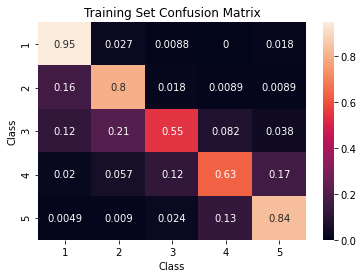

In [23]:
kwargs = dict(xticklabels=labels, yticklabels=labels, annot=True)
ax = sns.heatmap(c_mat_train, **kwargs)
ax.set(title="Training Set Confusion Matrix",
      xlabel="Class",
      ylabel="Class",)
plt.show()

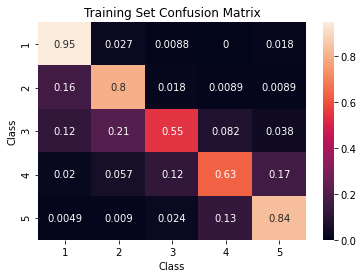

In [24]:
kwargs = dict(xticklabels=labels, yticklabels=labels, annot=True)
ax = sns.heatmap(c_mat_train, **kwargs)
ax.set(title="Training Set Confusion Matrix",
      xlabel="Class",
      ylabel="Class",)
plt.show()